In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from functions import *

# 1 Folder Data loading
The code is loading multiple CSV files from a specified folder path and converting them into pandas DataFrames.

In [38]:
folder_path = "data/e production=ep sanyo ep sanyo 002"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

dataframes = []
dfarrnames = []

# Loop through the CSV files and load only those ending with "Format01=Kreis 5-064"
# e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-16 070821=TBA_CU=TS010903  Format01=Kreis 5-064.csv
# e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-09 150506=TBA_Zyk=TS010620  Format01=Kreis 5-064.csv
for csv_file in csv_files:
    if "Format01=Kreis" in csv_file:
        if "TBA_Zyk" in csv_file:
            dfarr = pd.read_csv(csv_file, skiprows=[1])
            dfarr['Zeit'] = dfarr['Zeit'].apply(convert_to_linear_time)
            dfarr['Zeit'] = dfarr['Zeit'] - dfarr['Zeit'].iloc[0]
            dfarr['Zeit'] = dfarr['Zeit'] / 3600
            dataframes.append(dfarr)
            dfarrnames.append(csv_file)

noFiles = 0
for i, dfarr in enumerate(dataframes):
    num_rows, num_columns = dfarr.shape
    print(f"DataFrame {i + 1} - Rows: {num_rows}, Columns: {num_columns}")
    noFiles += 1
print(noFiles)

DataFrame 1 - Rows: 89410, Columns: 18
DataFrame 2 - Rows: 73298, Columns: 18
DataFrame 3 - Rows: 88666, Columns: 18
DataFrame 4 - Rows: 88428, Columns: 18
DataFrame 5 - Rows: 88300, Columns: 18
DataFrame 6 - Rows: 88156, Columns: 18
DataFrame 7 - Rows: 82806, Columns: 18
DataFrame 8 - Rows: 88059, Columns: 18
DataFrame 9 - Rows: 88009, Columns: 18
DataFrame 10 - Rows: 87786, Columns: 18
DataFrame 11 - Rows: 87437, Columns: 18
DataFrame 12 - Rows: 86887, Columns: 18
DataFrame 13 - Rows: 85831, Columns: 18
DataFrame 14 - Rows: 84802, Columns: 18
DataFrame 15 - Rows: 83475, Columns: 18
DataFrame 16 - Rows: 82491, Columns: 18
DataFrame 17 - Rows: 38664, Columns: 18
17


test that data is loaded succesfully

In [39]:
i=1
num_rows, num_columns = dataframes[i].shape

print(f"Number of rows (length): {num_rows}")
print(f"Number of columns (width): {num_columns}")
dataframes[i].head()

Number of rows (length): 73298
Number of columns (width): 18


,Schritt,Zustand,Zeit,Programmdauer,Schrittdauer,Zyklus,Zyklusebene,Prozedur,Prozedurebene,AhAkku,AhLad,AhEla,AhStep,Energie,WhStep,Spannung,Strom,Temp1
0,4,DCH,0.000000,330.0,9.0,1,1,TBA_Zyk,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.526514,-2.220324,26.9375
1,4,DCH,0.000017,409.0,88.0,1,1,TBA_Zyk,0,-0.000082,0.0,0.000082,0.000082,-0.000287,0.000287,3.503850,-2.700662,26.9375
2,4,DCH,0.000017,409.0,88.0,1,1,TBA_Zyk,0,-0.000082,0.0,0.000082,0.000082,-0.000287,0.000287,3.503850,-2.700662,26.9375
3,4,DCH,0.000028,449.0,128.0,1,1,TBA_Zyk,0,-0.000082,0.0,0.000082,0.000082,-0.000287,0.000287,3.500194,-2.788511,26.9375
4,4,DCH,0.000061,568.0,247.0,1,1,TBA_Zyk,0,-0.000202,0.0,0.000202,0.000202,-0.000709,0.000709,3.500925,-2.731834,26.9375


### Plot all data from folder
The code snippet is defining a list `columns_to_plot` which contains the column numbers (indices) of the columns to be plotted. It then iterates over a list of dataframes (`dataframes`) and for each dataframe, it prints the graph number, calls a function `plot_threshold` passing the `columns_to_plot`, the current dataframe, and two threshold values start and end time as arguments. The variable `I` is used as a counter to keep track of the graph number.

0  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-09 150506=TBA_Zyk=TS010620  Format01=Kreis 5-064.csv


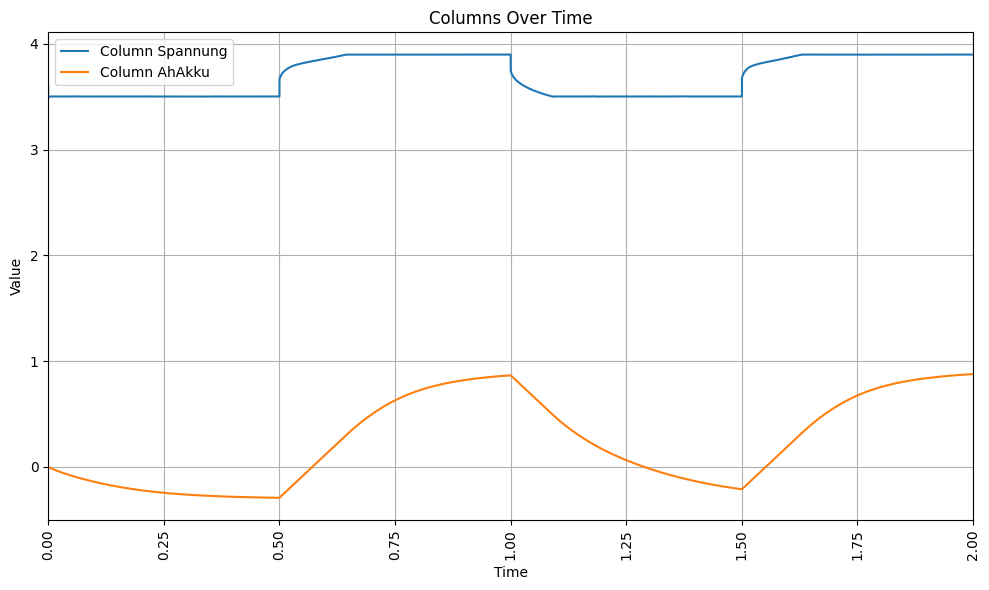

1  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-17 231027=TBA_Zyk=TS011008  Format01=Kreis 5-064.csv


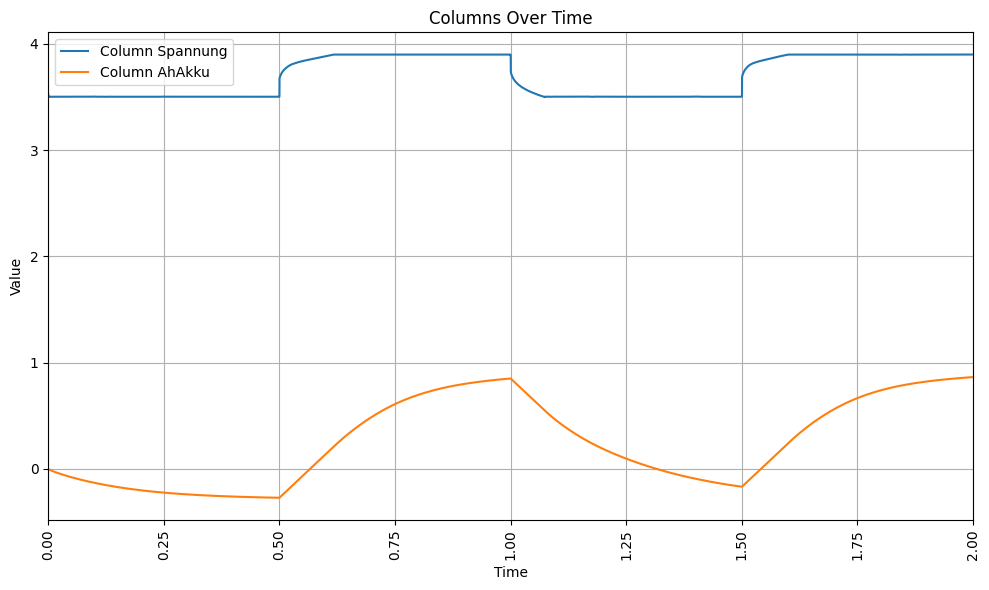

2  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-01-28 104307=TBA_Zyk=TS011418  Format01=Kreis 5-064.csv


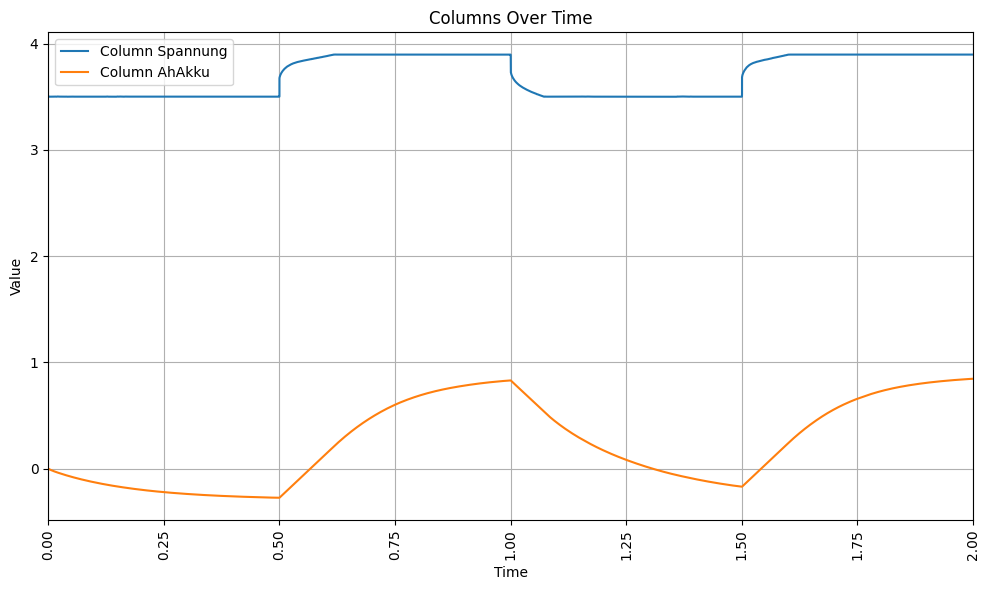

3  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-06 090540=TBA_Zyk=TS011909  Format01=Kreis 5-064.csv


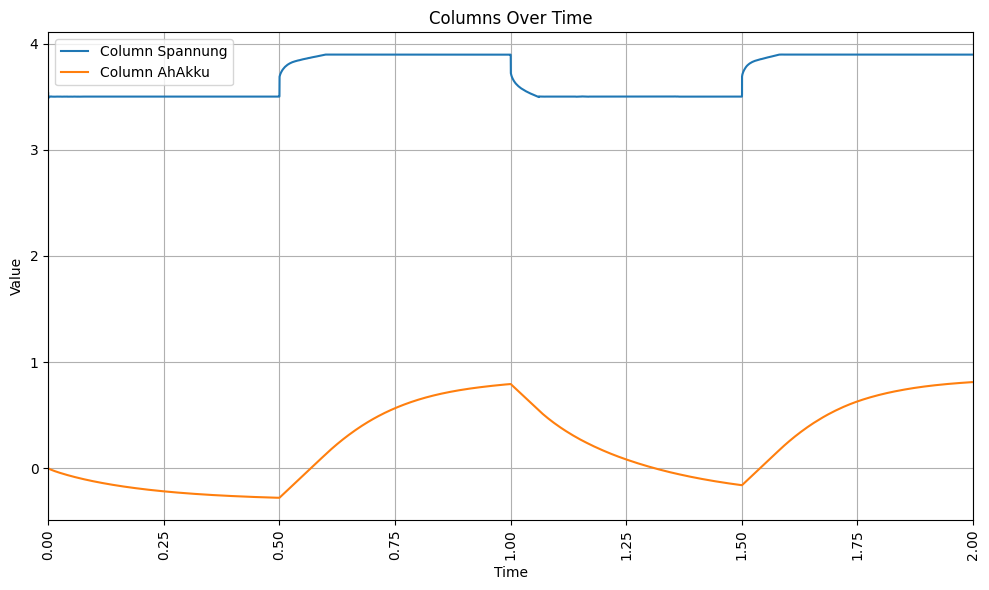

4  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-14 174435=TBA_Zyk=TS012335  Format01=Kreis 5-064.csv


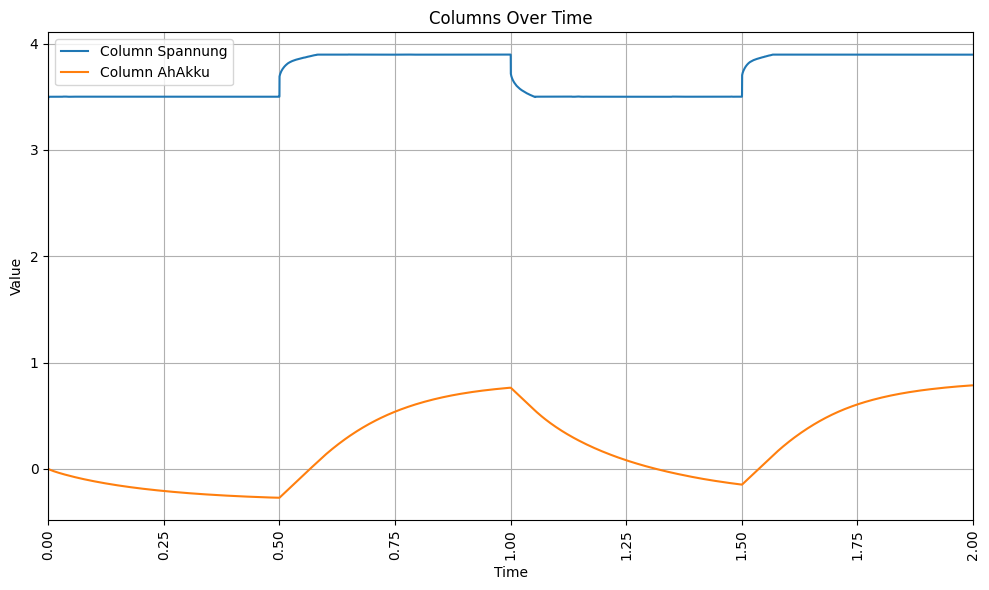

5  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-02-23 053444=TBA_Zyk=TS012805  Format01=Kreis 5-064.csv


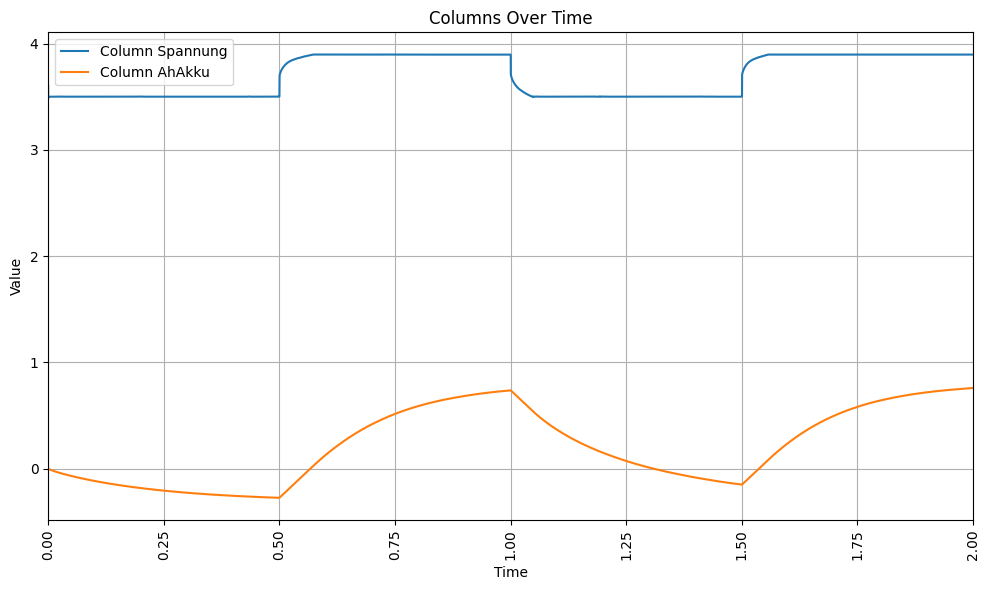

6  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-06 033649=TBA_Zyk=TS013340  Format01=Kreis 5-064.csv


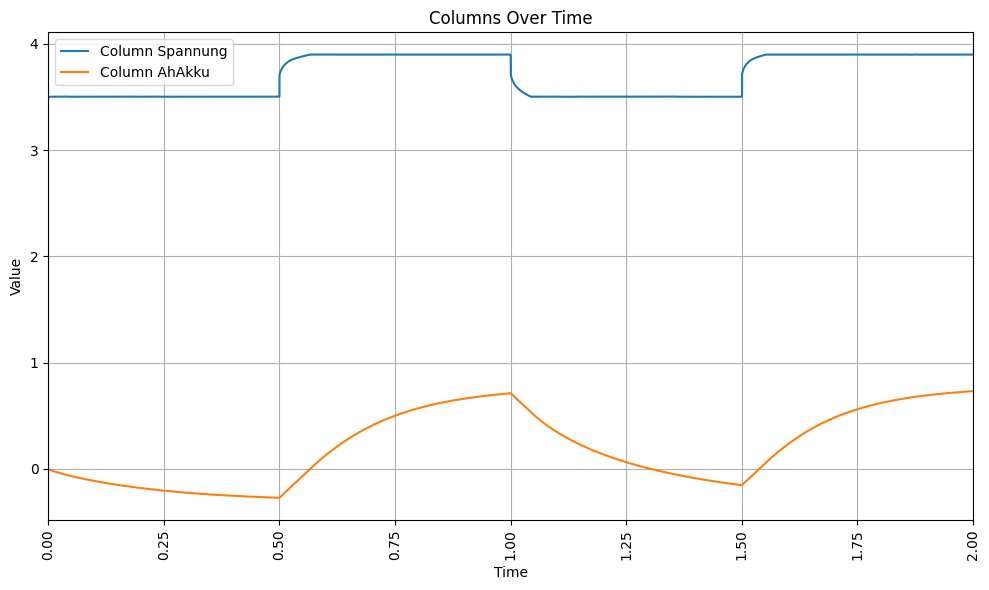

7  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-15 062128=TBA_Zyk=TS013897  Format01=Kreis 5-064.csv


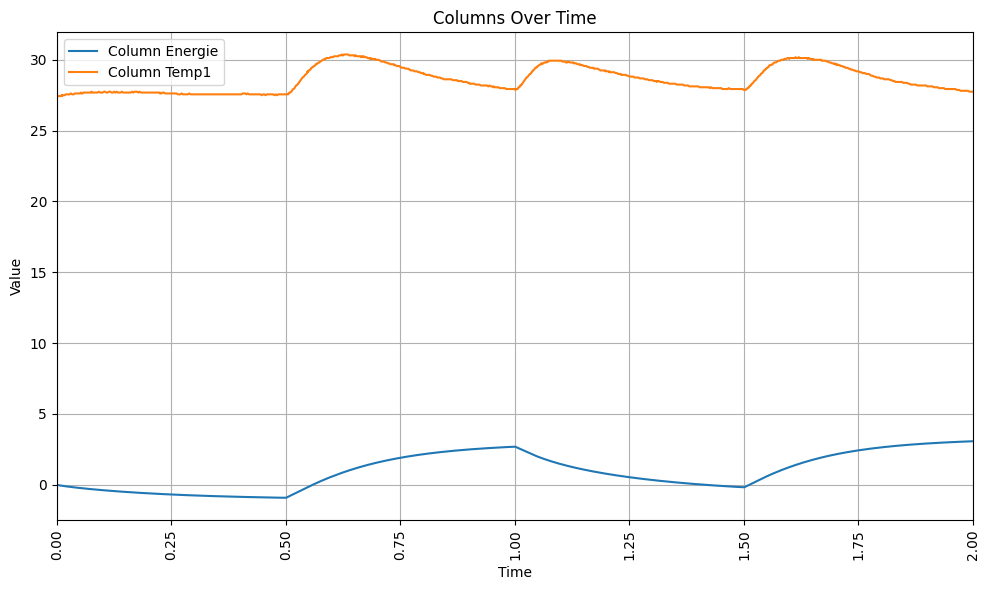

8  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-03-26 111919=TBA_Zyk=TS014603  Format01=Kreis 5-064.csv


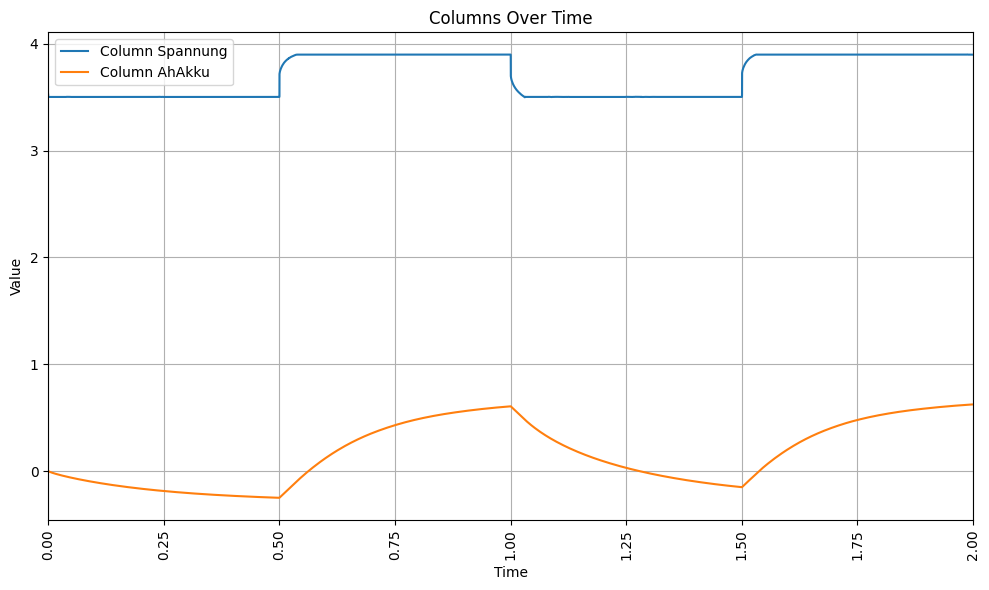

9  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-04 073855=TBA_Zyk=TS015019  Format01=Kreis 5-064.csv


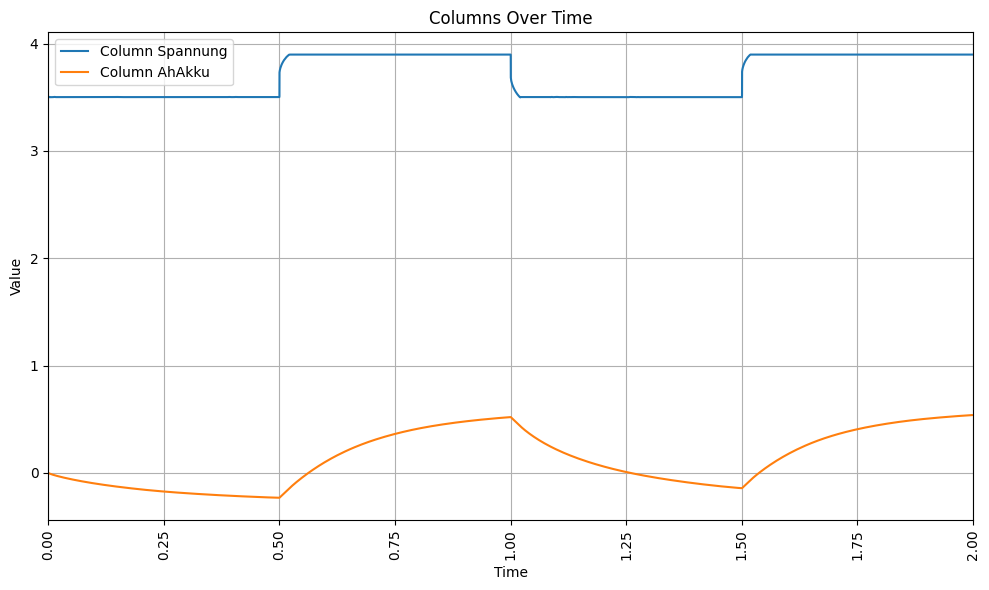

10  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-13 095758=TBA_Zyk=TS015484  Format01=Kreis 5-064.csv


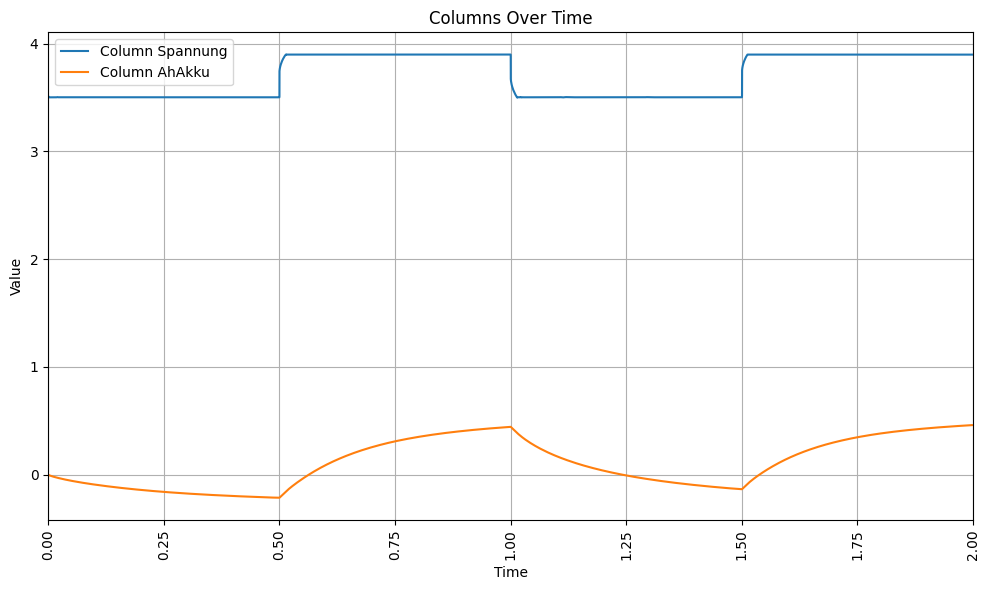

11  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-04-22 121200=TBA_Zyk=TS016025  Format01=Kreis 5-064.csv


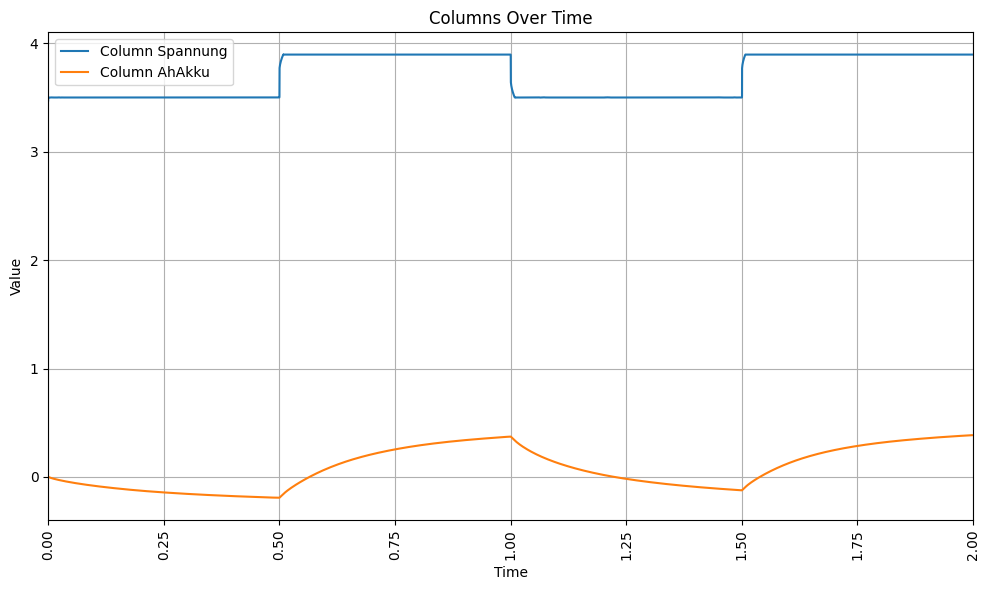

12  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-01 114153=TBA_Zyk=TS016609  Format01=Kreis 5-064.csv


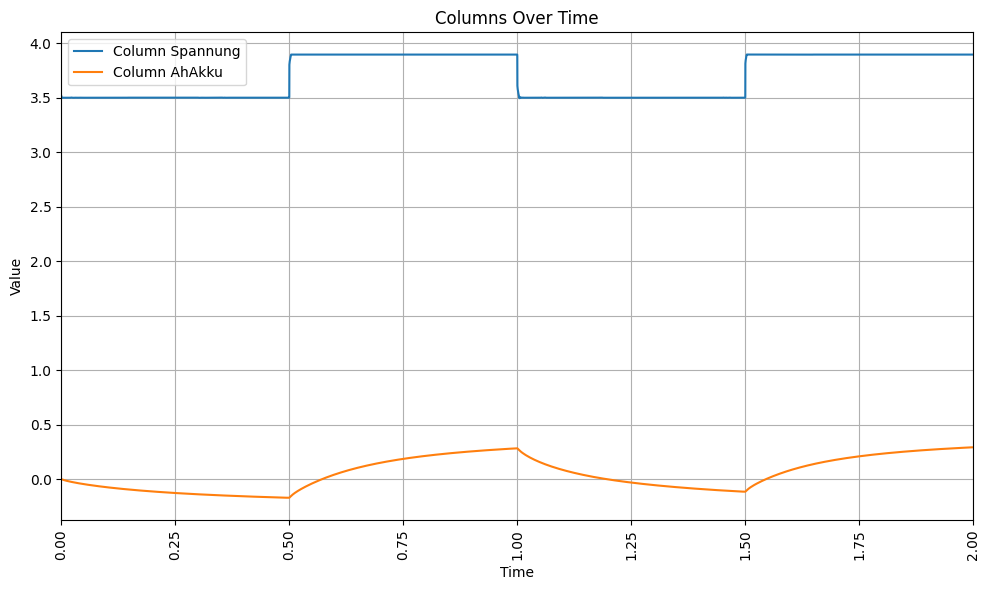

13  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-10 115459=TBA_Zyk=TS017090  Format01=Kreis 5-064.csv


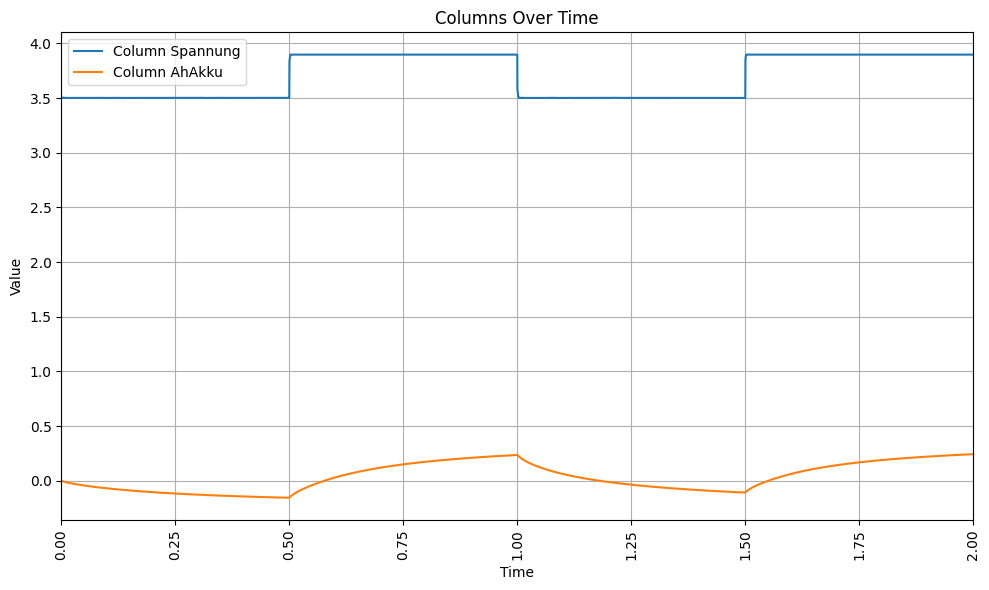

14  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-19 205627=TBA_Zyk=TS017577  Format01=Kreis 5-064.csv


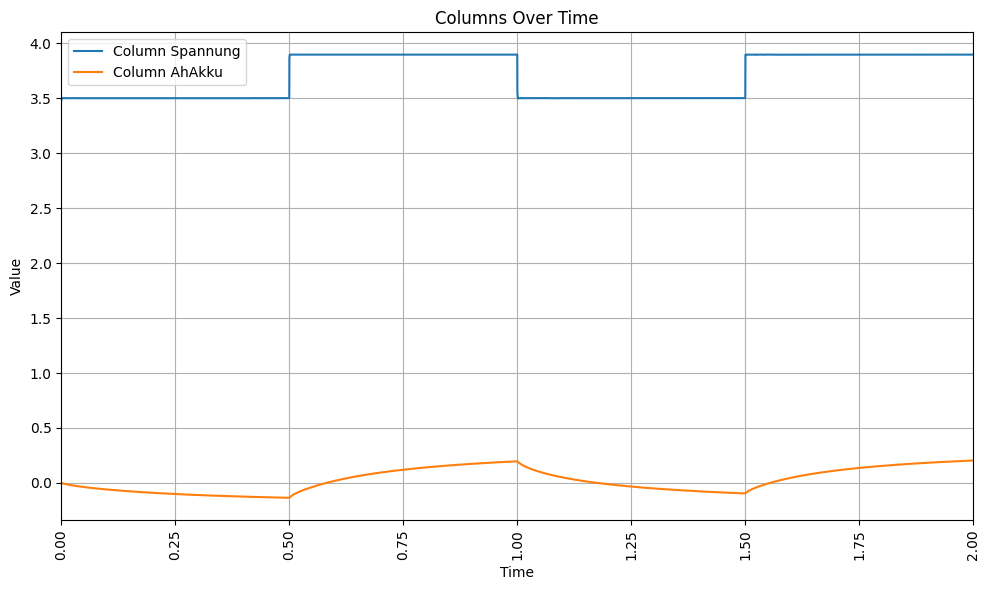

15  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-05-30 021448=TBA_Zyk=TS018179  Format01=Kreis 5-064.csv


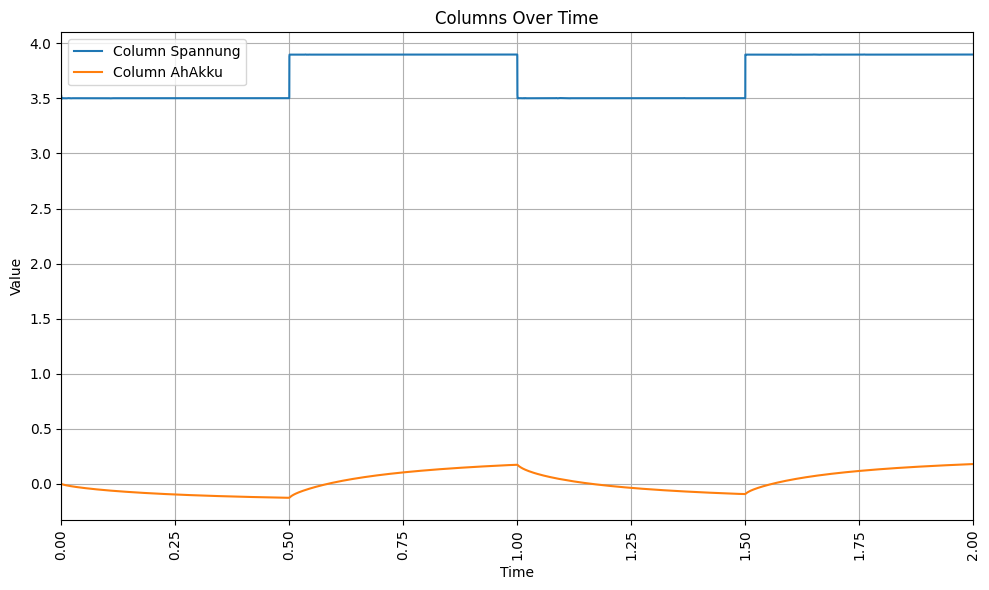

16  : data/e production=ep sanyo ep sanyo 002\e production=ep sanyo 002=ZYK=Massenalterung=2013-06-08 080143=TBA_Zyk=TS018687  Format01=Kreis 5-064.csv


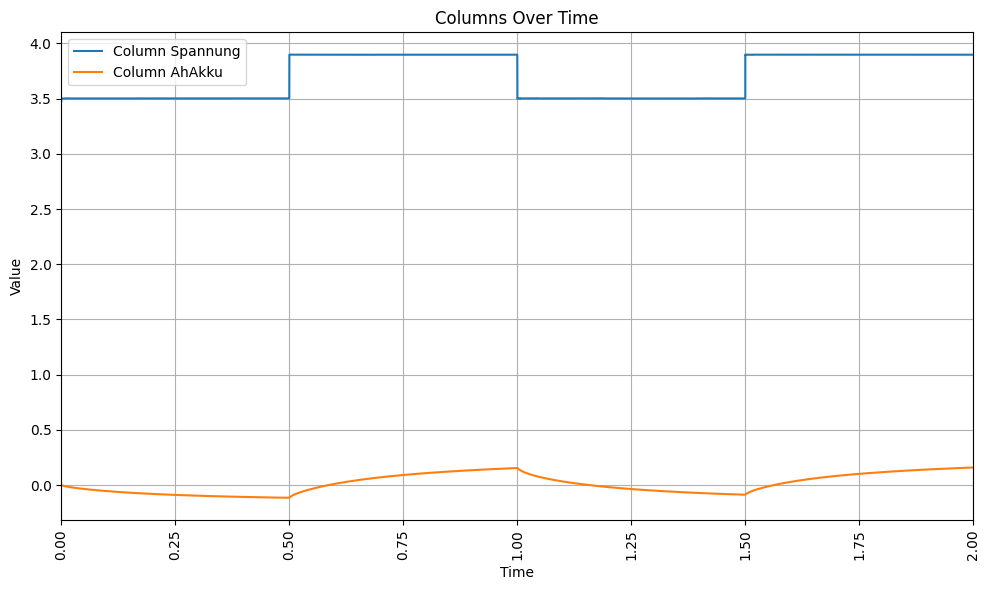

In [42]:
columns_to_plot = [15,9] 
#plotAllDates(dataframes[0],columns_to_plot)
I = 0
for i in dataframes:
    #print("Graph No. :",I)
    print(I,' :',dfarrnames[I])
    # plot(columns_to_plot,dataframes[I])
    plot_threshold(columns_to_plot, dataframes[I], 0, 2)
    I=I+1

# 4,7

# 2 Capacity Analysis
### Max Min Value extration
this code is extracting the `maximun` and `minimum` value between the start and end time for all files in folder.It also captures the capacity using `capacity = max - min` and store the data in the array.  

In [289]:
columns_to_plot = [9]

max_values_list = []
min_values_list = []
capacity_values_list = []
iteration_range = range(len(dataframes))

for df in dataframes:
    max_values = max_threshold(columns_to_plot, df, 11, 21)
    min_values = min_threshold(columns_to_plot, df, 11, 21)
    
    max_values_list .append(max_values)
    min_values_list.append(min_values)
    capacity = max_values[0]-min_values[0]
    capacity_values_list.append(capacity)

print(max_values_list)
print(min_values_list)
print(capacity_values_list)
print(iteration_range)

[[2.512948733623489], [2.506704811101372], [2.543738248838054], [2.538791181188572], [2.538695086757798], [3.259110481674725], [2.546989368292998], [2.718868245512567], [2.549460202593764], [2.618374756268167], [2.650589085063984], [2.467536640364415], [2.479579816266778], [2.501187635407405], [2.453454201666318], [2.382412096023472], [2.470213039210648]]
[[0.698714602887776], [0.7646620331606755], [0.7856070096895564], [0.8125349584051946], [0.8460636535046433], [1.562708852767173], [0.9101984712424382], [1.148079135291482], [1.141796210853499], [1.342393651402745], [1.486068386391708], [1.527462761572679], [1.647023849327525], [1.758972768002423], [1.767711578047965], [1.781450634285648], [1.901634442368959]]
[1.8142341307357128, 1.7420427779406964, 1.7581312391484976, 1.7262562227833773, 1.6926314332531547, 1.696401628907552, 1.6367908970505596, 1.5707891102210847, 1.407663991740265, 1.275981104865422, 1.164520698672276, 0.9400738787917358, 0.8325559669392528, 0.7422148674049822, 0.

### Extract Requried data
The extract contain the array of elements to plot for the calculation of capacity.

In [290]:
skip_indices = []

# Use list comprehension to skip specific indices
extracted_capacity_values = [value for i, value in enumerate(capacity_values_list) if i not in skip_indices]

iteration_range = range(len(extracted_capacity_values))

print(extracted_capacity_values)
print(iteration_range)

[1.8142341307357128, 1.7420427779406964, 1.7581312391484976, 1.7262562227833773, 1.6926314332531547, 1.696401628907552, 1.6367908970505596, 1.5707891102210847, 1.407663991740265, 1.275981104865422, 1.164520698672276, 0.9400738787917358, 0.8325559669392528, 0.7422148674049822, 0.685742623618353, 0.6009614617378238, 0.5685785968416888]
range(0, 17)


### ploting the capacity
It plot the capacity over days asuming that the each file in the folder is of one day.

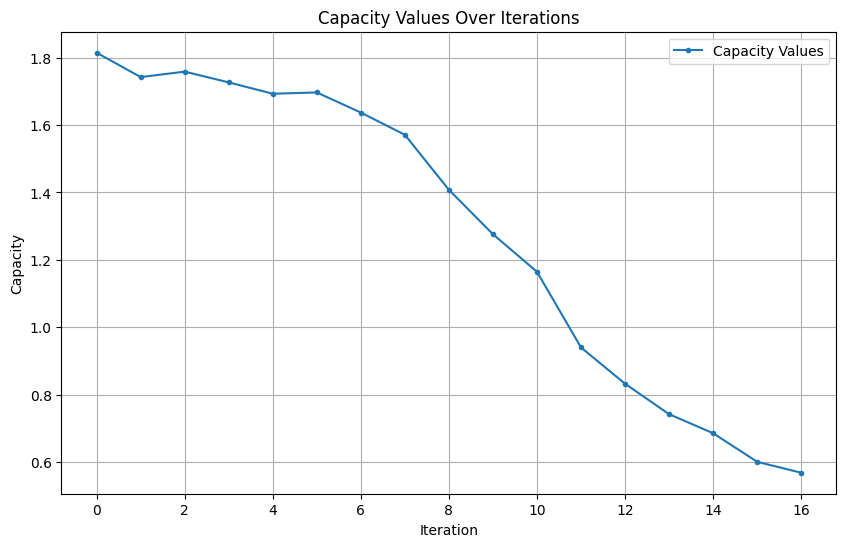

In [291]:
plt.figure(figsize=(10, 6))
plt.plot(iteration_range, extracted_capacity_values, label='Capacity Values', marker='.')
plt.xlabel('Iteration')
plt.ylabel('Capacity')
plt.legend()
plt.title('Capacity Values Over Iterations')
plt.grid(True)

plt.show()

### Save the graph data
this code is saving the data of the graphs for later use 
how to use
-  If you are using it first time  clear the data in `extracted_capacity_values.csv`
- first get your desired output on the above graph
- run this code only once
- it will store it in csv that you can later use to display all graphs at one

In [292]:
csv_filename = "extracted_capacity_values.csv"

with open(csv_filename, 'a', newline='') as csvfile:
    values_as_string = ",".join(map(str, extracted_capacity_values))
    csvfile.write(values_as_string + "\n")

print(f"Values have been appended to the CSV file '{csv_filename}'")

Values have been appended to the CSV file 'extracted_capacity_values.csv'


### Ploting all Cell Data
This will take csv of the above code block and plot all the data that is stored aleady

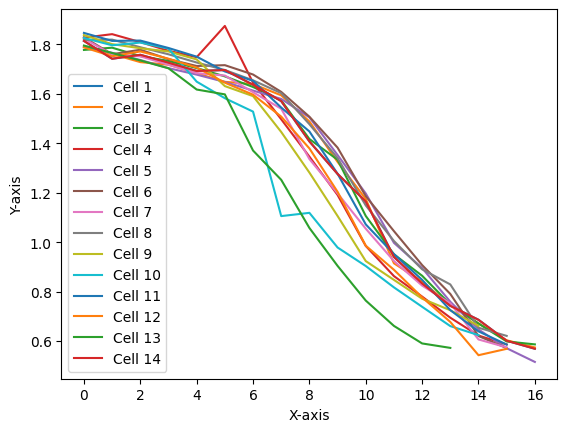

In [293]:
csv_file = 'extracted_capacity_values.csv'

csvdf = pd.read_csv(csv_file, header=None)

num_rows, num_columns = csvdf.shape

for row in range(num_rows):
    plt.plot(csvdf.iloc[row], label=f'Cell {row + 1}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.show()

# 3 Volatge Charging analysis

In [294]:
columns_to_check = [15] 
i=0
for df in dataframes:
    print(i)
    i=i+1
    print_times_near_threshold(columns_to_check, df, 16, 22, threshold=3.6)

0
Spannung , 3.6 t = 17.18984166668521
Spannung , 3.6 t = 20.58439722220103
1
Spannung , 3.6 t = 16.473408333328035
Spannung , 3.6 t = 19.790202777783076
Spannung , 3.6 t = 21.11533333334658
2
Spannung , 3.6 t = 17.5013611111376
Spannung , 3.6 t = 21.248766666650774
3
Spannung , 3.6 t = 17.051363888912732
Spannung , 3.6 t = 17.143016666637525
Spannung , 3.6 t = 20.715416666666666
Spannung , 3.6 t = 21.953230555521117
4
Spannung , 3.6 t = 17.381922222243414
Spannung , 3.6 t = 20.925750000013245
5
Spannung , 3.6 t = 16.90136388891273
Spannung , 3.6 t = 20.593194444444446
Spannung , 3.6 t = 21.816733333335982
6
Spannung , 3.6 t = 17.317997222211627
Spannung , 3.6 t = 20.88759722226196
7
Spannung , 3.6 t = 18.7400555555688
Spannung , 3.6 t = 21.77078888886505
8
Spannung , 3.6 t = 17.215044444402057
Spannung , 3.6 t = 20.07909999999735
9
Spannung , 3.6 t = 18.81781388892068
Spannung , 3.6 t = 21.57075833333863
10
Spannung , 3.6 t = 19.040041666693156
Spannung , 3.6 t = 21.69853611111641
11


### Ploting Voltage
`data_extract` is the array of `(dataframe,starttime)`
- `starttime` is  the that you will place manully by using data above code output
- try to use first most value of the repected data frame if it is not working use the last one or randomly
- you can look above 35 graphs to figure out the proper value of  `starttime`
- `dataframe` is the correct that you want to include in the ploting 

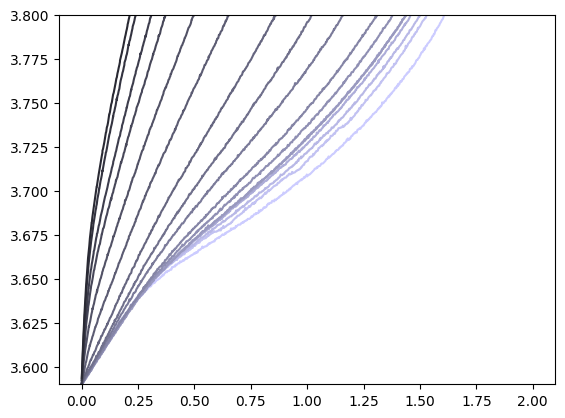

In [295]:
columns_to_plot = [15] 

data_extract = [
    (0, 17.18984166668521),
    (1, 16.473408333328035),
    (2, 17.5013611111376),          
    (3, 17.051363888912732),
    (4, 17.381922222243414),
    (5, 16.90136388891273),
    (6, 17.317997222211627),
    (7, 21.77078888886505),
    (8, 20.07909999999735),
    (9, 21.57075833333863),
    (10, 21.69853611111641), 
    (11, 19.765241666701105),
    (12, 19.64445555554496),
    (13, 18.8569111111429),
    (14, 18.817994444436497),
    (15, 17.723547222216926),
    (16, 18.57358888891008)
]

plt1 = plt
i=0
for dataframe_index, time_start in data_extract:
    time_end = time_start + 2
    plot_threshold_same_plot(columns_to_plot, dataframes[dataframe_index], time_start, time_end, plt1, y_min=3.59, y_max=3.8,i=i)
    i=i+1

plt1.show()

### Croping Data

In [296]:
from functions import crop_data_within_time_range
import os

output_directory = "cropped_data"
os.makedirs(output_directory, exist_ok=True)

In [297]:
columns_to_plot = [15, 9]

data_extract = [
    (0, 17.18984166668521),
    (1, 16.473408333328035),
    (2, 17.5013611111376),
    (3, 17.051363888912732),
    (4, 17.381922222243414),
    (5, 16.90136388891273),
    (6, 17.317997222211627),
    (7, 21.77078888886505),
    (8, 20.07909999999735),
    (9, 21.57075833333863),
    (10, 21.69853611111641),
    (11, 19.765241666701105),
    (12, 19.64445555554496),
    (13, 18.8569111111429),
    (14, 18.817994444436497),
    (15, 17.723547222216926),
    (16, 18.57358888891008)
]

extract = [item[0] for item in data_extract]

extracted_capacity_values = [capacity_values_list[i] for i in extract]

i = 0
for dataframe_index, time_start in data_extract:
    time_end = time_start + 2
    cropdf = crop_data_within_time_range(columns_to_plot, dataframes[dataframe_index], time_start, time_end)

    cropdf['total_capacity_values'] = extracted_capacity_values[i]

    csv_filename = os.path.join(output_directory, f"cropdf_{i}.csv")
    cropdf.to_csv(csv_filename, index=False)
    
    print(f"Saved CSV file: {csv_filename}")
    i += 1


Saved CSV file: cropped_data\cropdf_0.csv
Saved CSV file: cropped_data\cropdf_1.csv
Saved CSV file: cropped_data\cropdf_2.csv
Saved CSV file: cropped_data\cropdf_3.csv
Saved CSV file: cropped_data\cropdf_4.csv
Saved CSV file: cropped_data\cropdf_5.csv
Saved CSV file: cropped_data\cropdf_6.csv
Saved CSV file: cropped_data\cropdf_7.csv
Saved CSV file: cropped_data\cropdf_8.csv
Saved CSV file: cropped_data\cropdf_9.csv
Saved CSV file: cropped_data\cropdf_10.csv
Saved CSV file: cropped_data\cropdf_11.csv
Saved CSV file: cropped_data\cropdf_12.csv
Saved CSV file: cropped_data\cropdf_13.csv
Saved CSV file: cropped_data\cropdf_14.csv
Saved CSV file: cropped_data\cropdf_15.csv
Saved CSV file: cropped_data\cropdf_16.csv


In [298]:

merged_df = pd.DataFrame()

for filename in os.listdir(output_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(output_directory, filename)

        df = pd.read_csv(file_path)

        df = df[(df['Spannung'] >= 3.65) & (df['Spannung'] <= 3.85)]

        merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_csv_filename = 'filtered_data_output.csv'
merged_df.to_csv(merged_csv_filename, index=False)

print(f"Merged and filtered data saved to: {merged_csv_filename}")

Merged and filtered data saved to: filtered_data_output.csv


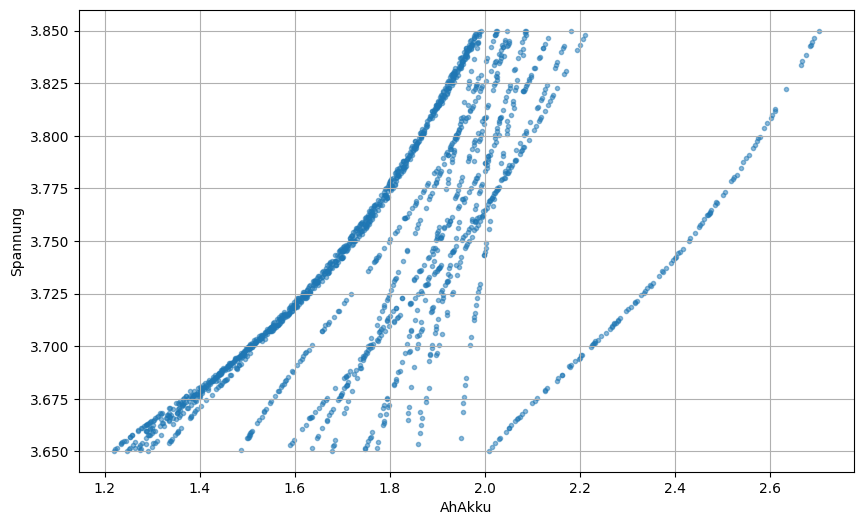

In [299]:
df = pd.read_csv(merged_csv_filename)

# Extract the columns
voltage = df['Spannung']
current = df['AhAkku']

# Randomly select 1000 values
random_indices = np.random.choice(len(df), size=1700, replace=False)
voltage_sample = voltage.iloc[random_indices]
current_sample = current.iloc[random_indices]

plt.figure(figsize=(10, 6))

plt.scatter(current_sample, voltage_sample, marker='.', alpha=0.5)

plt.xlabel('AhAkku')
plt.ylabel('Spannung')
plt.grid(True)
plt.show()